### Zad 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as sps

In [2]:
def f(mi,sigma,n,m):
    estims = np.zeros(m)

    for i in range(m):
        data = np.random.lognormal(mi,sigma,n)
        mean = sum(data)/n
        estims[i] = mean
    return estims

empiryczna: 3.081634463809803
teoretyczna: 3.080216848918031
empiryczna: 0.002840293178808026
teoretyczna: 0.002694758124344947


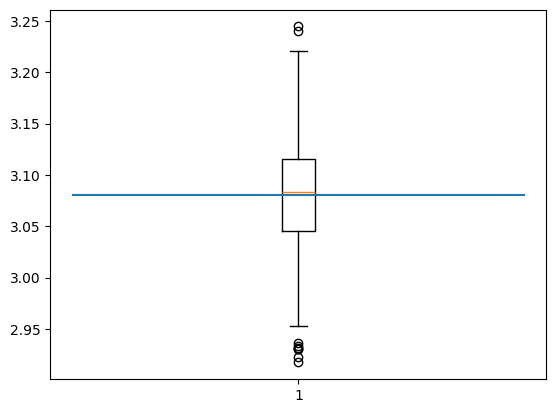

In [3]:
#1
mi = 1
sigma = 0.5
n = 1000
m = 1000

estims = f(mi,sigma,n,m)

print("empiryczna:",np.mean(estims))
print("teoretyczna:",np.exp((sigma**2)/2+mi))
print("empiryczna:",np.power(np.std(estims),2))
print("teoretyczna:" ,np.exp(2*mi+np.power(sigma,2))*(np.exp(np.power(sigma,2))-1)/m)
plt.boxplot(estims)
plt.plot(np.linspace(0,2,n),(np.exp((sigma**2)/2+mi)*np.ones(n)))

empiryczna: 4.477625976696114
teoretyczna: 4.4816890703380645
empiryczna: 0.03255838871332233
teoretyczna: 0.03451261310995657


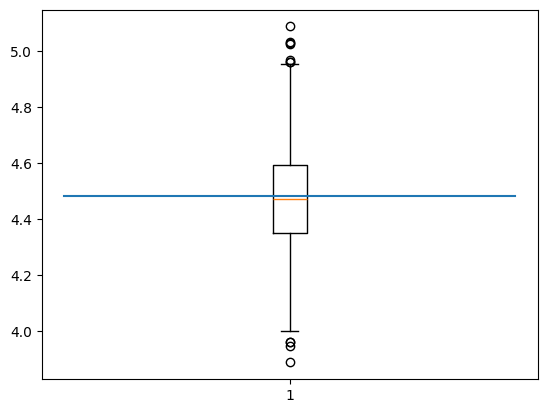

In [4]:
mi = 1
sigma = 1
n = 1000
m = 1000

estims = f(mi,sigma,n,m)
print("empiryczna:",np.mean(estims))
print("teoretyczna:",np.exp((sigma**2)/2+mi))
print("empiryczna:",np.power(np.std(estims),2))
print("teoretyczna:" ,np.exp(2*mi+np.power(sigma,2))*(np.exp(np.power(sigma,2))-1)/m)
plt.boxplot(estims)
plt.plot(np.linspace(0,2,n),(np.exp((sigma**2)/2+mi)*np.ones(n)))

empiryczna: 19.93261159840697
teoretyczna: 20.085536923187668
empiryczna: 15.312024806650657
teoretyczna: 21.62303700131398


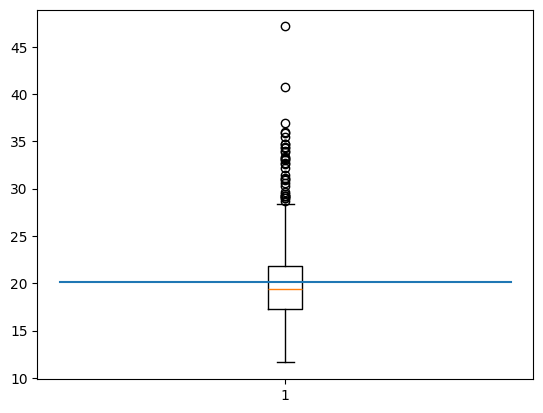

In [5]:
mi = 1
sigma = 2
n = 1000
m = 1000

estims = f(mi,sigma,n,m)

print("empiryczna:",np.mean(estims))
print("teoretyczna:",np.exp((sigma**2)/2+mi))
print("empiryczna:",np.power(np.std(estims),2))
print("teoretyczna:" ,np.exp(2*mi+np.power(sigma,2))*(np.exp(np.power(sigma,2))-1)/m)
plt.boxplot(estims)
plt.plot(np.linspace(0,2,n),(np.exp((sigma**2)/2+mi)*np.ones(n)))

### Zad 2

In [6]:
def u_sample_normal(n):
    data = np.random.normal(2,1,n)
    return max(data)

def u_sample_lognormal(n):
    data = np.random.lognormal(2,1,n)
    return max(data)

def u_sample_pareto(n):
    data = np.random.pareto(2,n)
    return max(data)


n=1000
u1_samples = np.zeros(n)
u2_samples = np.zeros(n)
u3_samples = np.zeros(n)
for i in range(n):
    u1_samples[i] = u_sample_normal(n)
    u2_samples[i] = u_sample_lognormal(n)
    u3_samples[i] = u_sample_pareto(n)

#dokończyc




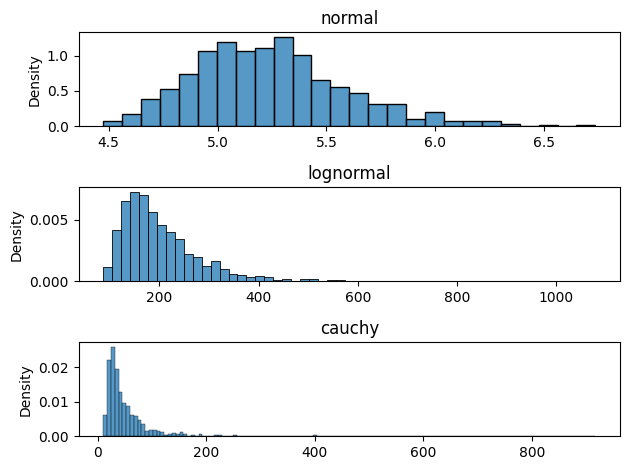

In [22]:
plot1 = plt.subplot2grid((3, 1), (0, 0)) 
sb.histplot(u1_samples,stat="density",label="normal")
plot1.set_title('normal')


plot2 = plt.subplot2grid((3, 1), (1, 0)) 
sb.histplot(u2_samples,stat="density", label="lognormal")
plot2.set_title('lognormal')

plot3 = plt.subplot2grid((3, 1), (2,0 )) 
sb.histplot(u3_samples,stat="density",label="cauchy")
plot3.set_title('cauchy')

plt.tight_layout() 

### Zad 6
$$
F(t) = 1-t^{-\alpha}x_0^{\alpha}\\
\\
1-t^{-\alpha}x_0^{\alpha} = y \\
\\
t^{-\alpha}x_0^{\alpha} = -y + 1 \\
\\
t^{-\alpha} = \frac{-y + 1}{x_0^{\alpha}}\\
\\

t = (\frac{-y + 1}{x_0^{\alpha}})^{-\frac{1}{\alpha}}

$$

In [ ]:
x_0 = 2
alpha = 5

def gen_pareto(x_0, alpha):
    u = np.random.random()
    return np.power(u,-1/alpha)*x_0

def estimate(data):
    n = len(data)
    x_hat = min(data)
    suma = 0
    for i in range(n):
        suma += np.log(data[i])
    alpha_hat = n/(suma - n*np.log(x_hat))
    return x_hat, alpha_hat


In [ ]:
n = 1000
x_hat_data = np.zeros(n)
alpha_hat_data = np.zeros(n)
for i in range(n):
    data = np.zeros(n)
    for j in range(n):
        data[j] = gen_pareto(x_0,alpha)
    x_hat_data[i], alpha_hat_data[i] = estimate(data)

In [ ]:
plt.boxplot(x_hat_data)

In [ ]:
plt.boxplot(alpha_hat_data)

### zad 7

In [ ]:
def gen_y(theta):
    u = np.random.random()
    return theta - np.log(u)

### zad 8


In [23]:
def gen_norm(mi,n):
    return np.random.normal(mi,1,n)

In [30]:
mi = 0
n = 1000
size = 2*n+1
k=100

estims1 = np.zeros(k)
estims2 = np.zeros(k)

for i in range(k):
    probe = gen_norm(mi,size)
    estims1[i] = np.mean(probe)
    estims2[i] = probe[n]

est1_err = np.var(estims1) + np.power(np.mean(estims1)-mi,2)
print("błąd średniokwadratowy estymatora pierwszego: {}".format(est1_err))


est2_err = np.var(estims2) + np.power(np.mean(estims2)-mi,2)
print("błąd średniokwadratowy estymatora drugiego: {}".format(est2_err))


błąd średniokwadratowy estymatora pierwszego: 0.0005530631044653851
błąd średniokwadratowy estymatora drugiego: 1.2018245963115544


### zad 10

In [72]:
mi = 2
sigma = 4
estims1 = np.zeros(1000)
estims2 = np.zeros(1000)
for i in range(1000):
    probe = np.random.normal(mi,sigma,7)
    estims1[i] = np.mean(probe)
    estims2[i] = (2*probe[0]-probe[5]+probe[3])/2


<Axes: ylabel='Proportion'>

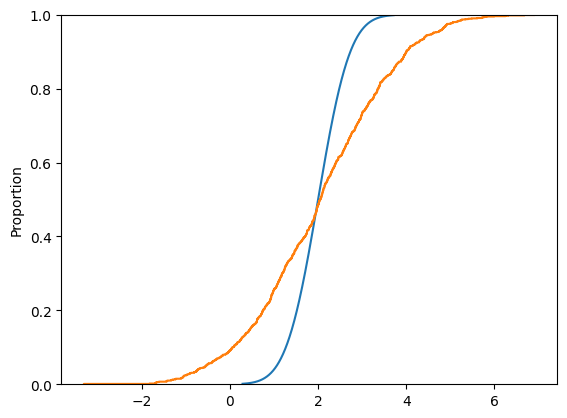

In [78]:
sigma1 = sigma/7
fig, ax = plt.subplots(1, 1)
x = np.linspace(mi-3*sigma1, mi+3*sigma1, 1000)
ax.plot(x, sps.norm.cdf(x, loc = mi, scale = sigma1), label='norm pdf')
sb.ecdfplot(estims1)


<Axes: ylabel='Proportion'>

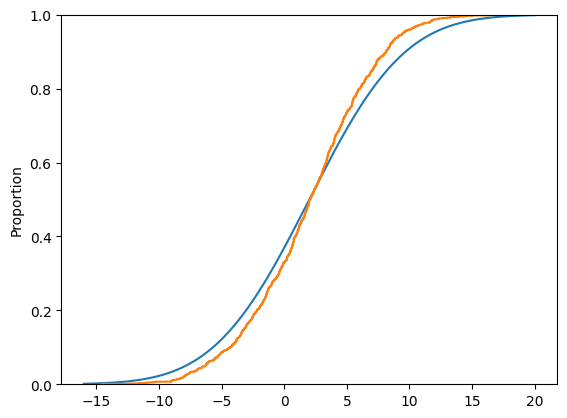

In [77]:
sigma2 = 3*sigma/2
fig, ax = plt.subplots(1, 1)
x = np.linspace(mi-3*sigma2, mi+3*sigma2, 1000)
ax.plot(x, sps.norm.cdf(x, loc = mi, scale = sigma2), label='norm pdf')
sb.ecdfplot(estims2)
